In [46]:
!pip install tensorflow

In [48]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pathlib import Path
from PIL import Image
from tensorflow.keras import layers
from sklearn import preprocessing

In [50]:
image_link = list(Path(r'C:\Users\purna\OneDrive\Desktop\weather\weather\dataset2').glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

In [52]:
import numpy as np
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype = str)
df['name'] = image_name
df['label'] = image_label

In [54]:
df

,link,name,label
0,C:\Users\purna\OneDrive\Desktop\weather\weathe...,cloudy,3
1,C:\Users\purna\OneDrive\Desktop\weather\weathe...,cloudy,3
2,C:\Users\purna\OneDrive\Desktop\weather\weathe...,cloudy,3
3,C:\Users\purna\OneDrive\Desktop\weather\weathe...,cloudy,3
4,C:\Users\purna\OneDrive\Desktop\weather\weathe...,cloudy,3
...,...,...,...
1041,C:\Users\purna\OneDrive\Desktop\weather\weathe...,Sunrise,2
1042,C:\Users\purna\OneDrive\Desktop\weather\weathe...,Sunrise,2
1043,C:\Users\purna\OneDrive\Desktop\weather\weathe...,Sunrise,2
1044,C:\Users\purna\OneDrive\Desktop\weather\weathe...,Sunrise,2


<Axes: xlabel='name'>

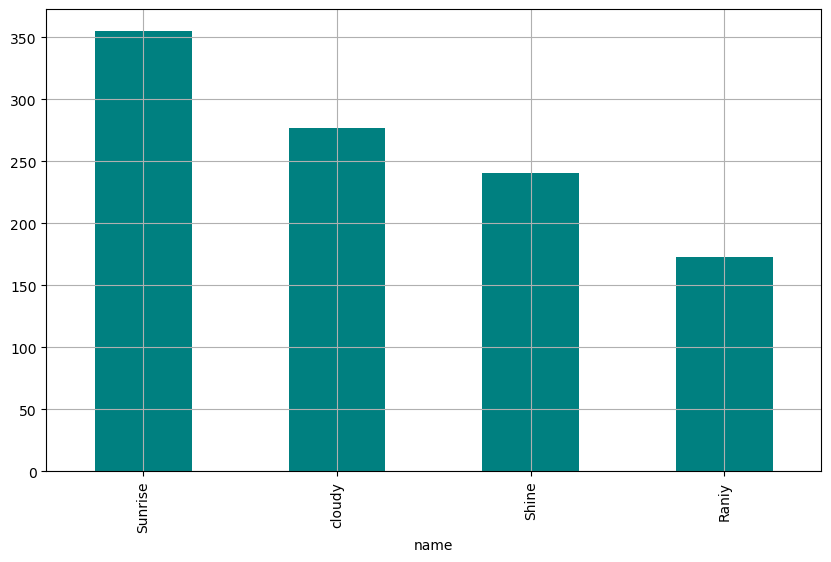

In [56]:
df.name.value_counts().plot(kind = 'bar', figsize = (10, 6), grid = True, color = 'teal')

In [58]:

train_df, test_df = train_test_split(df, test_size=0.3, random_state = 1)

In [60]:
train_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = train_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical',
    subset = 'training'

)

test_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = test_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical'
)

Found 732 validated image filenames belonging to 4 classes.
Found 314 validated image filenames belonging to 4 classes.


In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape = (28, 28, 3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.Conv2D(32, (3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(724, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

C:\Users\purna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history=model.fit(train_images, epochs = 10)

C:\Users\purna\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.3885 - loss: 12.8343
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.6989 - loss: 0.7537
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.7268 - loss: 0.6205
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.7587 - loss: 0.5466
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.8145 - loss: 0.4541
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.8682 - loss: 0.3309
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.8619 - loss: 0.3541
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.8773 - loss: 0.3041
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9083 - loss: 0.2621
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9147 - loss: 0.2386


In [65]:
model.evaluate(test_images)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.8397 - loss: 0.4210


[0.48572802543640137, 0.8152866363525391]

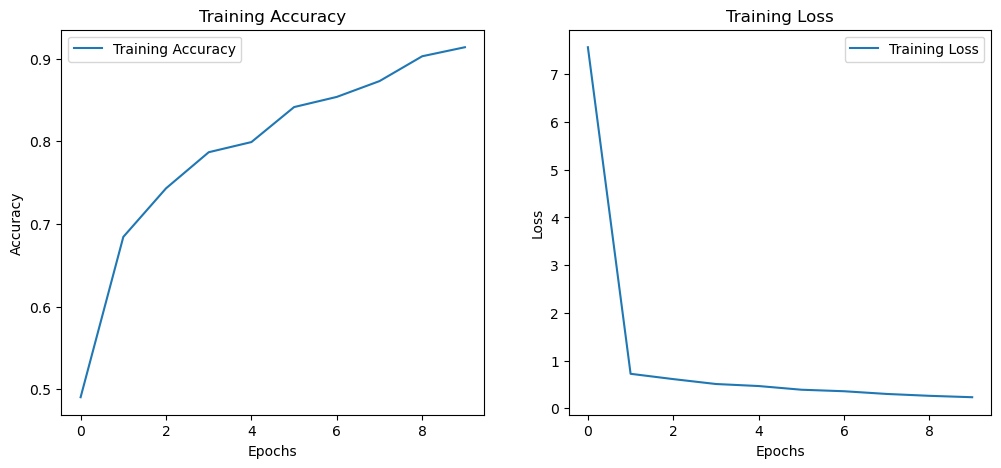

In [70]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step


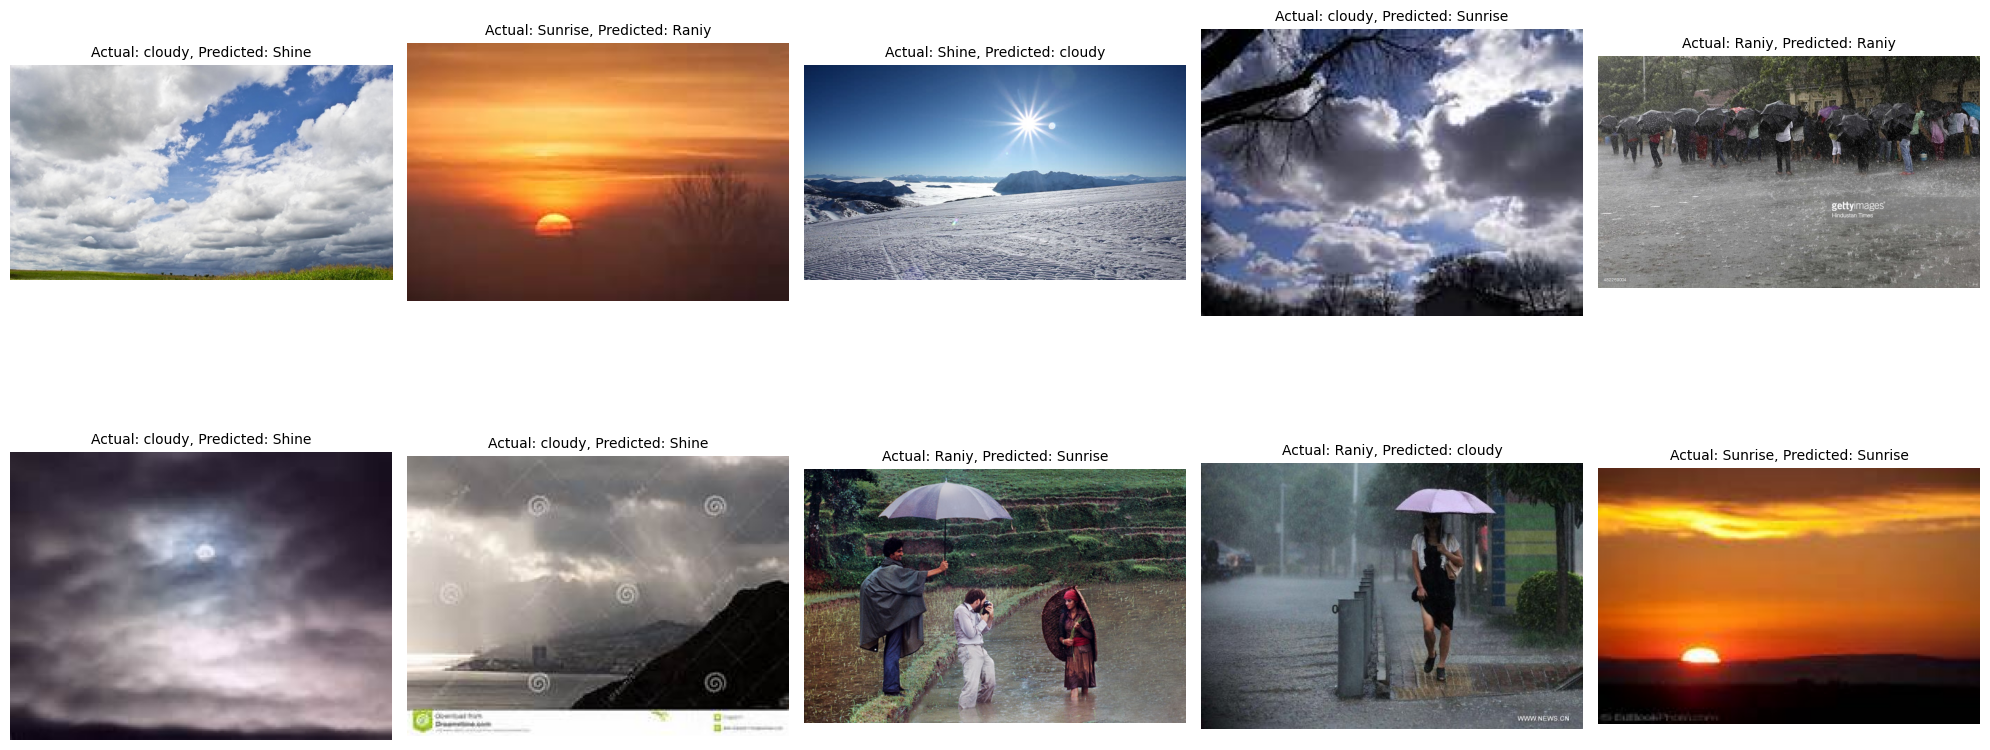

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

labels = train_images.class_indices  
labels = {v: k for k, v in labels.items()} 

y_pred_probs = model.predict(test_images) 
y_pred = np.argmax(y_pred_probs, axis=1) 

plt.figure(figsize=(20, 10))
num_images_to_display = 10

for i in range(num_images_to_display):
    img_path = test_df['link'].values[i]
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    
    actual_class = df['name'][test_df.index[i]]
    predicted_class = labels[y_pred[i]]

    plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()